# Titanic - Machine Learning from Disaster
## Problem Statement
### Using logistic regression you predict whether a passenger is alive or not

## A brief understanding of Titanic
### The sinking of the Titanic is one of the most infamous shipwrecks in history.
### On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

# Importing the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

# Importing the dataset

In [2]:
df = pd.read_csv('C:\\Users\\nagma\\Downloads\\titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
df.shape #Number of rows & columns

(887, 8)

#### Conclusion: As we can see there are 887 rows & 8 columns are present in our dataset.

In [4]:
df.head()  #getting first 5 rows

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
df.tail()  #getting last 5 rows

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


## Dataset Fields
### Survived: Binary value for survival (0 = No, 1 = Yes) & its datatype is nominal.
### Pclass: Ticket class for each passenger (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class) & its datatype is discrete.
### Name: Name of the passengers.
### Sex: Gender of each passenger.
### Age: Age of each passenger in years & its datatype is continuous.
### Siblings/Spouses Aboard: Number of siblings or spouses aboard the Titanic & its datatype is discrete.
### Parents/Children Aboard: Number of parents or children aboard the Titanic & its datatype is discrete.
### Fare: Price of the ticker & its datatype is discrete.

In [6]:
df.nunique()

Survived                     2
Pclass                       3
Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

### Looking at the statistical summary of our data

In [7]:
df.describe() # Getting some statistical measures about the data

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Getting information about our dataset

In [8]:
df.info() # Getting some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


#### Conclusion: The training-set has 887 examples and 7 features + the target variable (survived). 2 of the features are floats, 4 are integers and 2 are objects.

# Data wrangling

In [9]:
# Checking if there are any missing values are present in our dataset
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

#### Conclusion: As we can see there are no missing values in our dataset.

<AxesSubplot:>

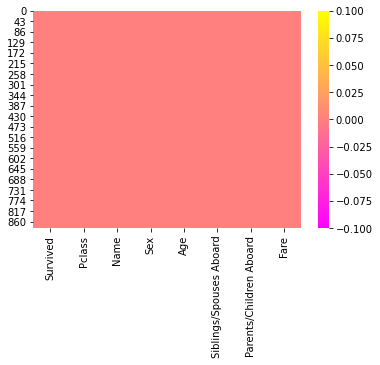

In [10]:
# visualizing the missing values
sns.heatmap(df.isnull(),cmap='spring')

# Analysing the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

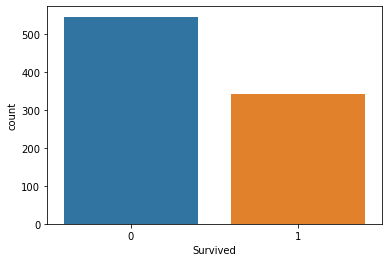

In [11]:
sns.countplot(x='Survived', data=df)

#### Conclusion: Here blue colour indicates not survived(0), whereas orange colour indicates survived(1).Those who did not survived(more than 500) are greater than those who survived(nearly 300)

<AxesSubplot:xlabel='Survived', ylabel='count'>

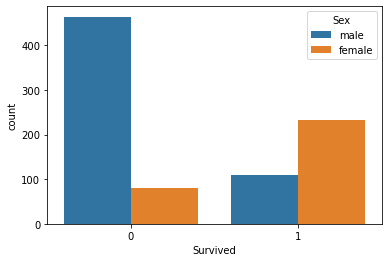

In [12]:
sns.countplot(x='Survived', hue='Sex', data=df)

#### Conclusion: Here we can clearly see that females are more survived than male. '0' represents not survived & '1' represents survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

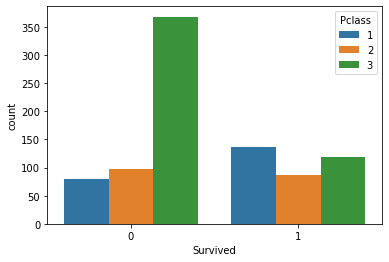

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=df)

#### Conclusion: The passangers who did not survived belong to the 3rd class & 1st class passangers are more likely to survive as you can see in the above graph

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

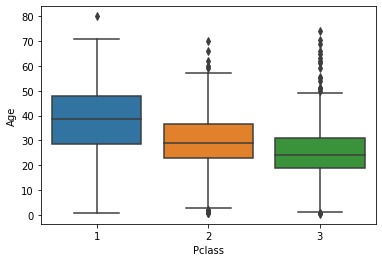

In [14]:
sns.boxplot(x='Pclass', y='Age', data=df)

#### Conclusion: we can observe that older age group are travelling more in class 1 and 2 as compared to class 3

# We will convert the few columns (strings) into Numerical data to apply logistic regression

## A One Hot Encoding is a representation of categorical variables as binary vectors. 

In [16]:
# Usisng One Hot Encoding
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


#### Conclusion: By using One Hot Encoding, the 'sex' column has converted to numerical value.

In [17]:
sex=pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


#### Conclusion: By using get_dummies,there is a negative point that we get multiple columns,so i have dropped one column (i.e.,firt column = female) just to make things simple.

In [18]:
df=pd.concat([df,sex], axis=1)
# Sanity check
df.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0


#### Conclusion: Here i have concatinated the new created column to the dataset as we can see the 'male' column above

In [19]:
# Dropping the unnecessary columns
df.drop(['Name', 'Sex', 'Pclass'],axis=1, inplace=True)
df.head(3)

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,1,26.0,0,0,7.9250,0


#### Conclusion: I have dropped the unwanted columns

# Scaling the Data
## StandardScaler standardizes a feature by subtracting the mean and then scaling it to unit variance.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["Survived", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "male"]] = scaler.fit_transform(df[["Survived", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "male"]])
df

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,-0.792163,-0.529366,0.429904,-0.474981,-0.503586,0.740266
1,1.262366,0.604265,0.429904,-0.474981,0.783412,-1.350867
2,1.262366,-0.245958,-0.475856,-0.474981,-0.490020,-1.350867
3,1.262366,0.391709,0.429904,-0.474981,0.417948,-1.350867
4,-0.792163,0.391709,-0.475856,-0.474981,-0.487507,0.740266
...,...,...,...,...,...,...
882,-0.792163,-0.175106,-0.475856,-0.474981,-0.388018,0.740266
883,1.262366,-0.741922,-0.475856,-0.474981,-0.046336,-1.350867
884,-0.792163,-1.592145,0.429904,2.003301,-0.177984,-1.350867
885,1.262366,-0.245958,-0.475856,-0.474981,-0.046336,0.740266


# Train data

In [20]:
X=df.drop('Survived', axis=1)
y=df['Survived']

#### Conclusion: X will contain all the features and y will contain the target variable

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression
## Logistic regression is a supervised learning algorithm used to predict the probability of a target variable. It is used for classification, in this case to predict whether a passenger survived or not

In [23]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [24]:
lm.fit(X_train, y_train)

LogisticRegression()

In [25]:
prediction = lm.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       179
           1       0.75      0.56      0.64       114

    accuracy                           0.76       293
   macro avg       0.76      0.72      0.73       293
weighted avg       0.76      0.76      0.75       293



In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[158,  21],
       [ 50,  64]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,prediction)

0.757679180887372

# Conclusion
## We have the accuracy of 0.7576 ~ 0.76 i.e, 76% which is quite good and the model can predict the data quite accurately. Here the prediction is of 0.76 i.e., 76% it means the person is 76% alive and 24% is dead.